In [1]:
import os
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sp_data = pd.read_parquet("data/processed_housing_sp_city.parquet")
sp_data

,property_type,usable_area,bathrooms,suites,bedrooms,garage_spots,sale_price
0,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,700000
1,Casa,129.0,2.0,1.0,3.0,2.0,336000
3,Apartamento,80.0,2.0,1.0,3.0,2.0,739643
4,Apartamento,3322.0,5.0,4.0,4.0,5.0,7520099
6,Apartamento,94.0,1.0,0.0,3.0,2.0,630700
...,...,...,...,...,...,...,...
133957,Apartamento,270.0,4.0,3.0,3.0,4.0,2835000
133958,Apartamento,60.0,1.0,NaN,1.0,1.0,251999
133959,Apartamento,53.0,2.0,1.0,2.0,1.0,249782
133961,Apartamento,20.0,3.0,2.0,3.0,2.0,623000


1. We have a grand total of 93,711 entries.
2. We have 7 features, which 6 are numerical, including the `sale_price`

# Data Overview

In [3]:
sp_data.describe(include="all")

,property_type,usable_area,bathrooms,suites,bedrooms,garage_spots,sale_price
count,93711,92066.000000,93706.000000,86000.000000,93708.000000,92117.000000,9.371100e+04
unique,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Apartamento,NaN,NaN,NaN,NaN,NaN,NaN
freq,64146,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,145.297689,2.426984,1.240512,2.670146,2.119033,7.875532e+05
std,NaN,560.545851,1.699433,1.194477,0.942181,1.833895,1.091308e+06
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.050000e+04
25%,NaN,64.000000,1.000000,0.000000,2.000000,1.000000,2.975000e+05
50%,NaN,103.000000,2.000000,1.000000,3.000000,2.000000,4.794990e+05
75%,NaN,176.000000,3.000000,2.000000,3.000000,3.000000,8.435000e+05


## Initial Observations
1. There a re 5 unique property types and "Apartamento" is the most common one.
2. `usable_are` has a wide range from 1 to 129,000 square meters.
3. `sale_price`range from 10,500 to 74,200,000.
4. Except their maximum values, `bathrooms`, `suites`, `bedrooms` and `garage_spots` have range from 0 to 3 at most, with integer values, indicating low cardinality.
5. Except for `property_type` and `sale_price`, all features have some missing values.

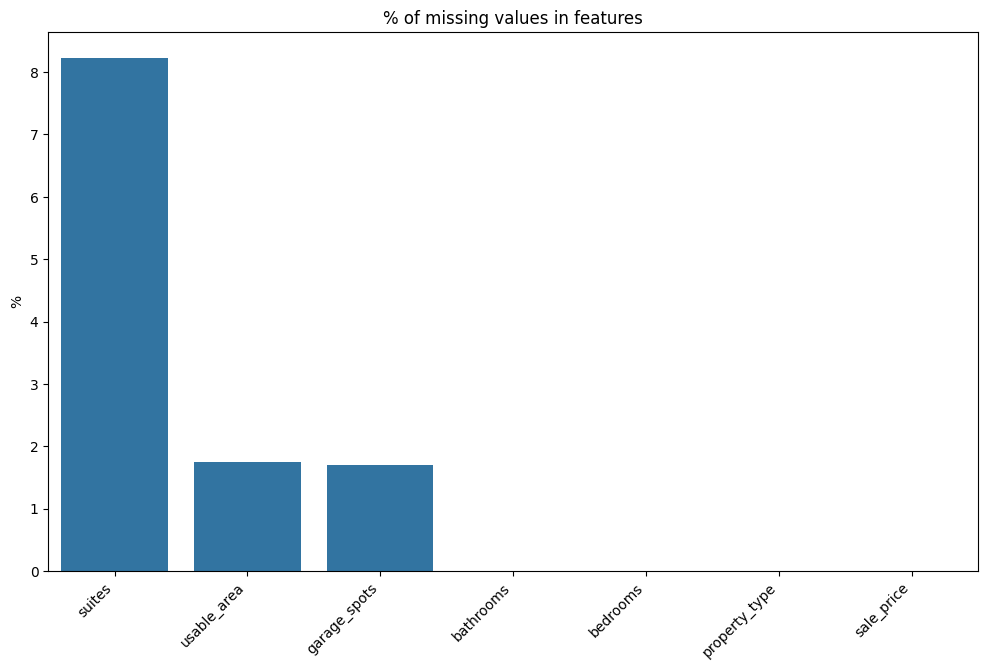

In [4]:
plt.figure(figsize=(12, 7))
sns.barplot(sp_data.isna().sum().sort_values(ascending=False) / len(sp_data) * 100)
plt.title("% of missing values in features")
plt.xticks(rotation=45, ha="right")
plt.ylabel("%")
plt.show()

# Univariate Analysis

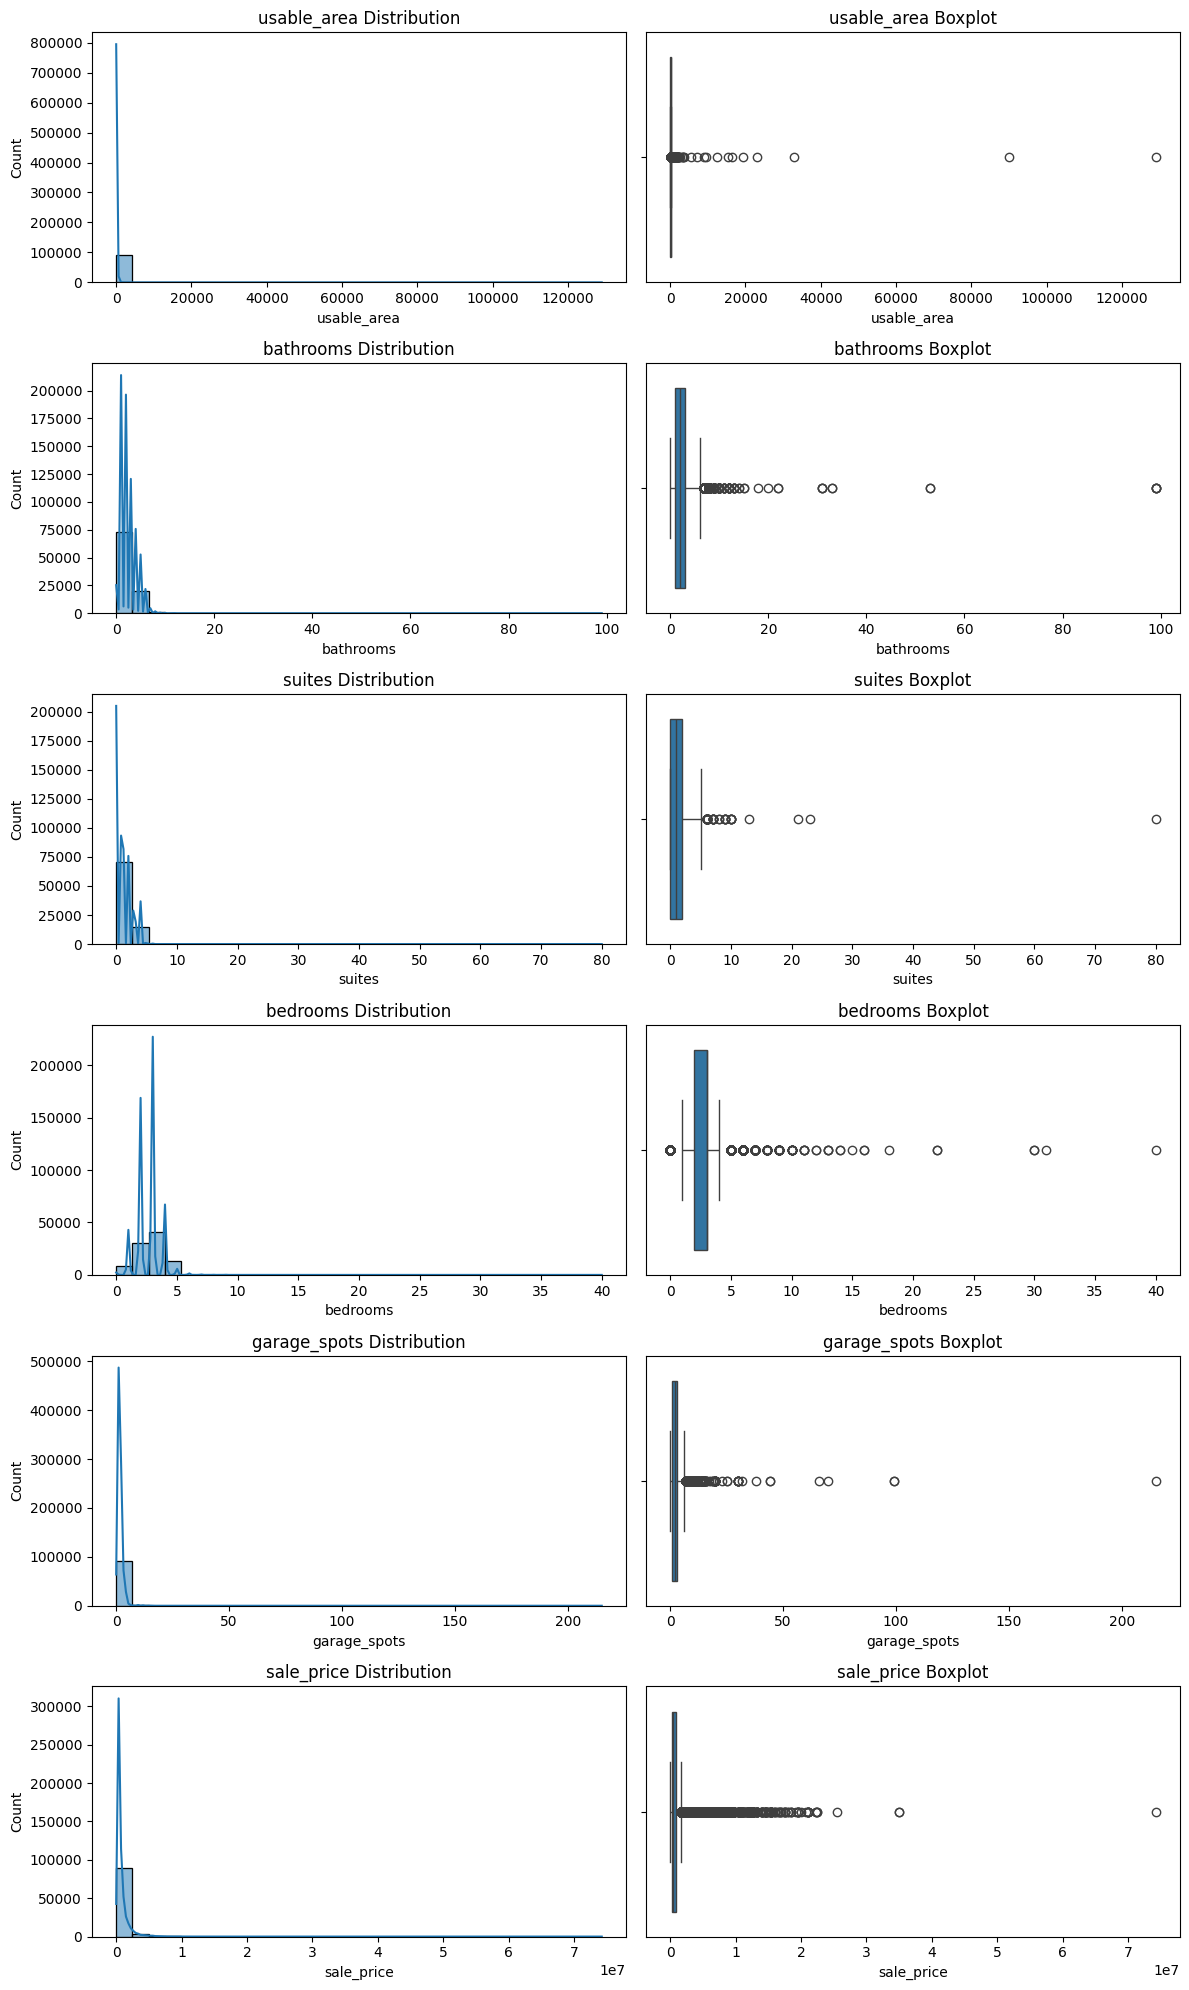

In [5]:
numerical_columns = [
    "usable_area",
    "bathrooms",
    "suites",
    "bedrooms",
    "garage_spots",
    "sale_price",
]

plt.figure(figsize=(12, 20))

for i, col in enumerate(numerical_columns):
    plt.subplot(6, 2, 2 * i + 1)
    sns.histplot(sp_data[col].dropna(), kde=True, bins=30)
    plt.title(f"{col} Distribution")

    plt.subplot(6, 2, 2 * i + 2)
    sns.boxplot(x=sp_data[col].dropna())
    plt.title(f"{col} Boxplot")

plt.tight_layout()
plt.show()

1. **Usable Area**
    - Highly skewed with long tail towards larger areas.
    - Signigicant outliers.

2. **Bathrooms**
    - Most properties habe between 1 and 4 bathrooms.
    - Some extreme outliers with very high numbers of bathrooms.

3. **Suites**
    - Many properties have 0 to 2 suites.
    - A few properties with a large number of suites.

4. **Bedrooms**
    - Most properties have 2 to 3 bedrooms.
    - Some properties habe an unusually high number of bedrooms.

5. **Garage Spots**
    - Most properties have 1 to 3 garages spots.
    - Some extreme outliers with a large number of garage spots.

6. **Sale Price**
    - Highly skewed with a few properties having extremely high prices.
    - A signigicant number of properties in the lower price range.

## Distribution of Numerical Variables

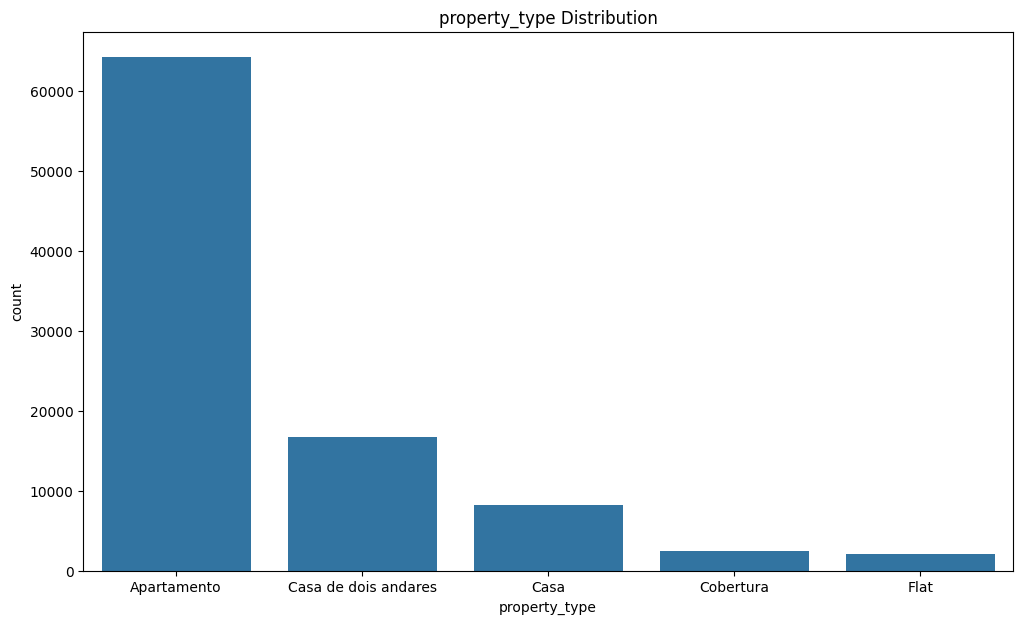

In [6]:
plt.figure(figsize=(12, 7))
sns.countplot(
    data=sp_data,
    x="property_type",
    order=sp_data["property_type"].value_counts().index,
)
plt.title("property_type Distribution")
plt.show()

- "Apartamento" is by far the most common property type, followed by "Casa".

# Multivariate Analysis

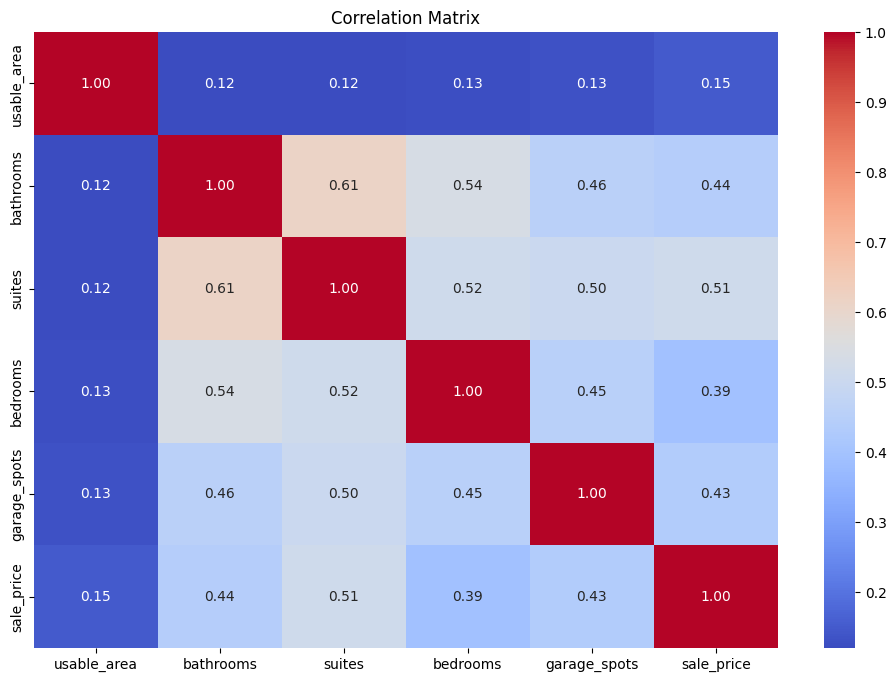

In [7]:
correlation_matrix = sp_data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

1. **High Positive Correlation**
    - Bathrooms and suites (0.61): Properties with more suites tend to have more bathrooms.

2. **Moderate Positive Correlation**
    - Suites and bedrooms (0.52): Properties with more suites tend to have more bedrooms.
    - Suites and sale price (0.51): Properties with more suites tend to have higher sale prices.
    - Suites and garage spots (0.5): Properties with more suites tend to have more garage spots.

3. **Low to Moderate Correlation**
    - Other pairs of variables show low to moderate correlation.

<Figure size 1600x2500 with 0 Axes>

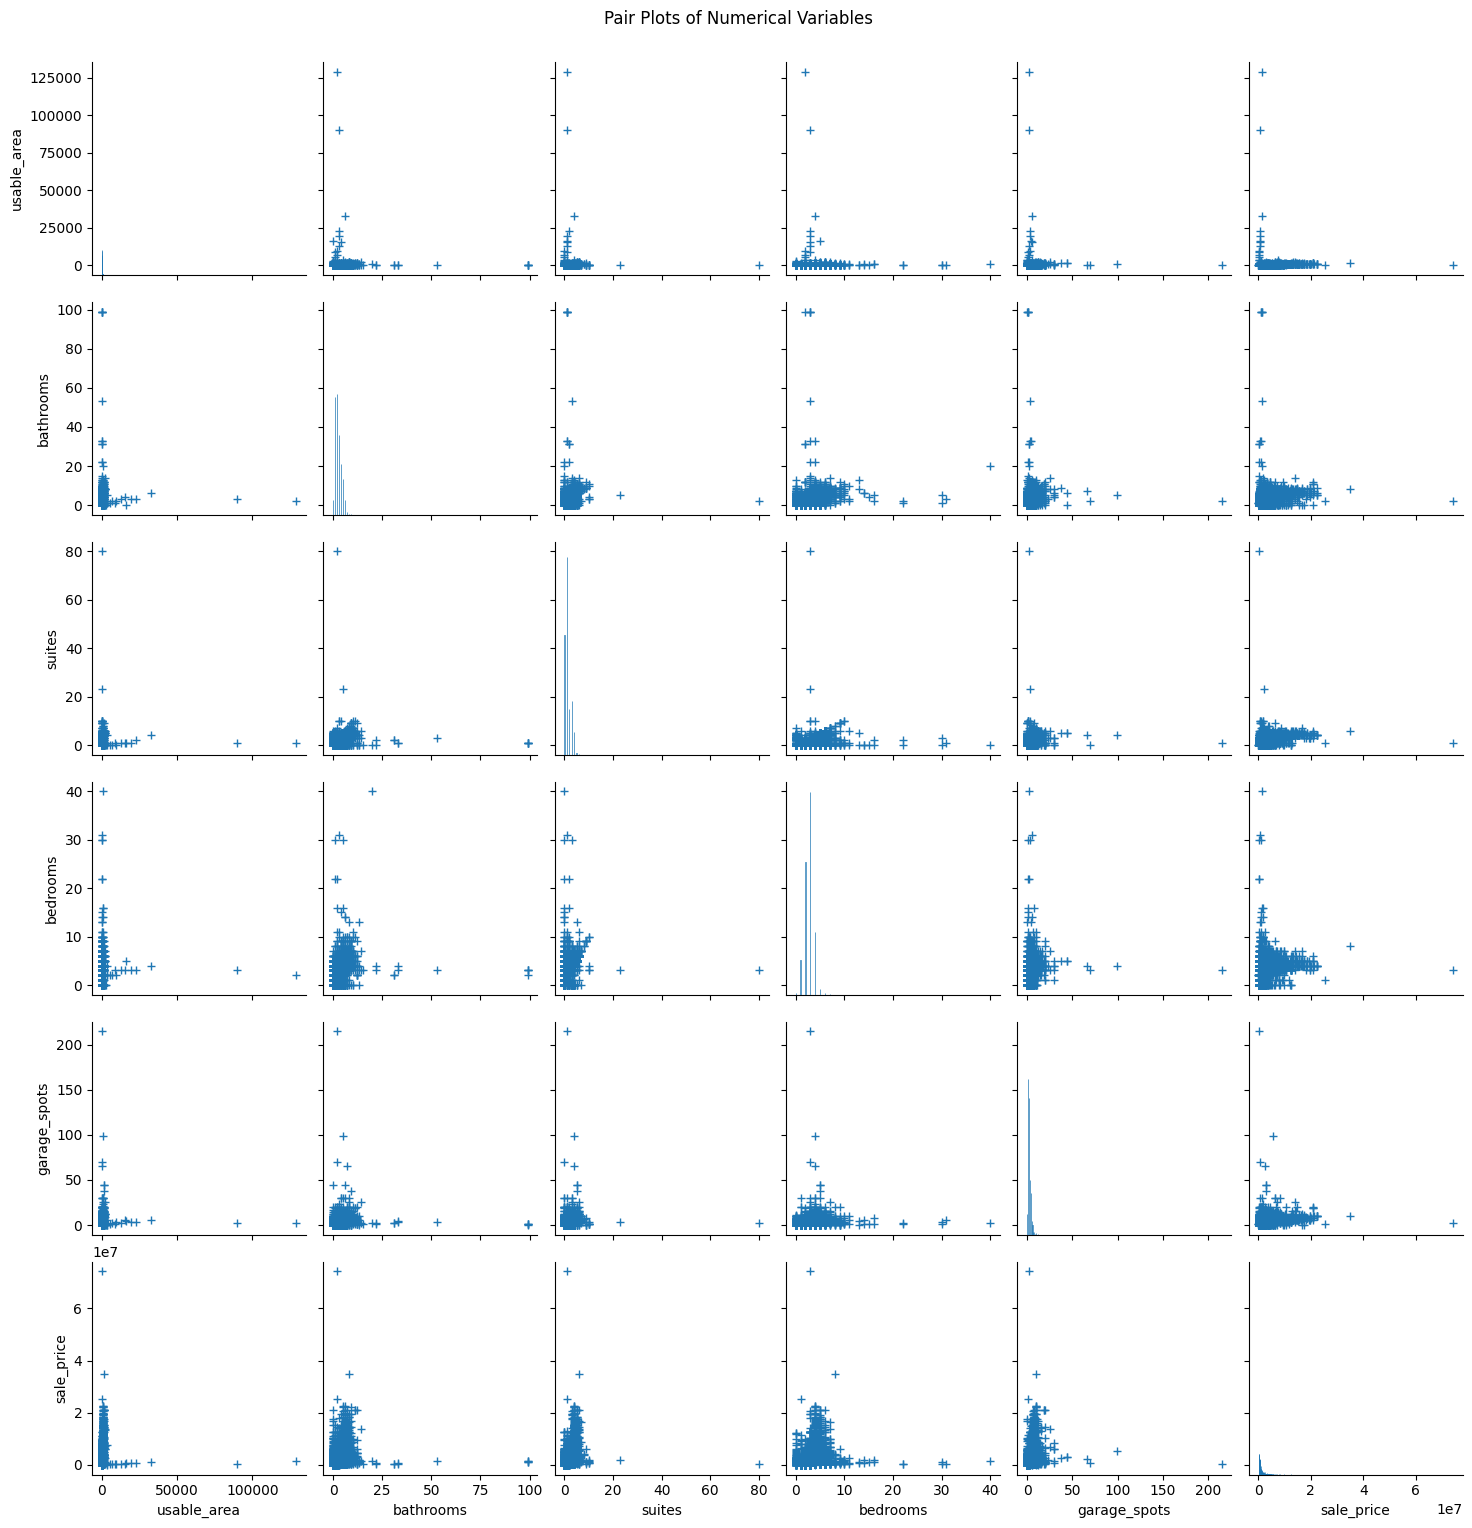

In [8]:
plt.figure(figsize=(16, 25))
sns.pairplot(
    sp_data[numerical_columns].dropna(),
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)
plt.suptitle("Pair Plots of Numerical Variables", y=1.02)
plt.show()

1. **Usable Are and Sale Price**
    - There is a positive correlation between usable area and sale price, indicating that house with larger usable areas tend to have higher sale prices.
    - Some extreme values (outliers) can be observed with very high sale prices and large usable areas.

2. **Bathrooms and Sale Price**
    - There is a slight positive correlation between the number of bathrooms and the sale price. Houses with more bathrroms tend to have higher prices, but the correlations is not very strong.

3. **Suites and Sale Price**
    - There is a noticable positive correlation between the number of suites and the sale price. Houses with more suites generally have higher sale prices.

4. **Bedrooms and Sale Price**
    - There is a weak positive correlation between the number of bedrooms and the sale price. However, this correlations is not as string as that of suites or usable area.

5. **Garage Spots and Sale Price**
    - There is a slight positive correlation between the number of garage spots and the sale price. Houses with more garage spots tend to have highewr prices.

6. **Interrelationships Among Features**
    - Usable area shows some correlation with other features like bathrroms, suites, and bedrooms, suggesting that larger houses tend to have more of these features.
    - Suites show some correlation with bathrooms, bedrooms, and garage spotsm indicating that houses with more suites might also have more of these other features.

7. **Outliers**
    - There are several outliers in the dataset, specially in the sale price, usable area, and number of bathrooms. These extreme values can influence the analysis and might need to be treated separately.

Overall, the plot indicates that features like usable area, suites, and bathrooms have a positive relationship with the sale price, which is consistent with expectations that larger and more well-equipped houses tend to sell for higher prices.

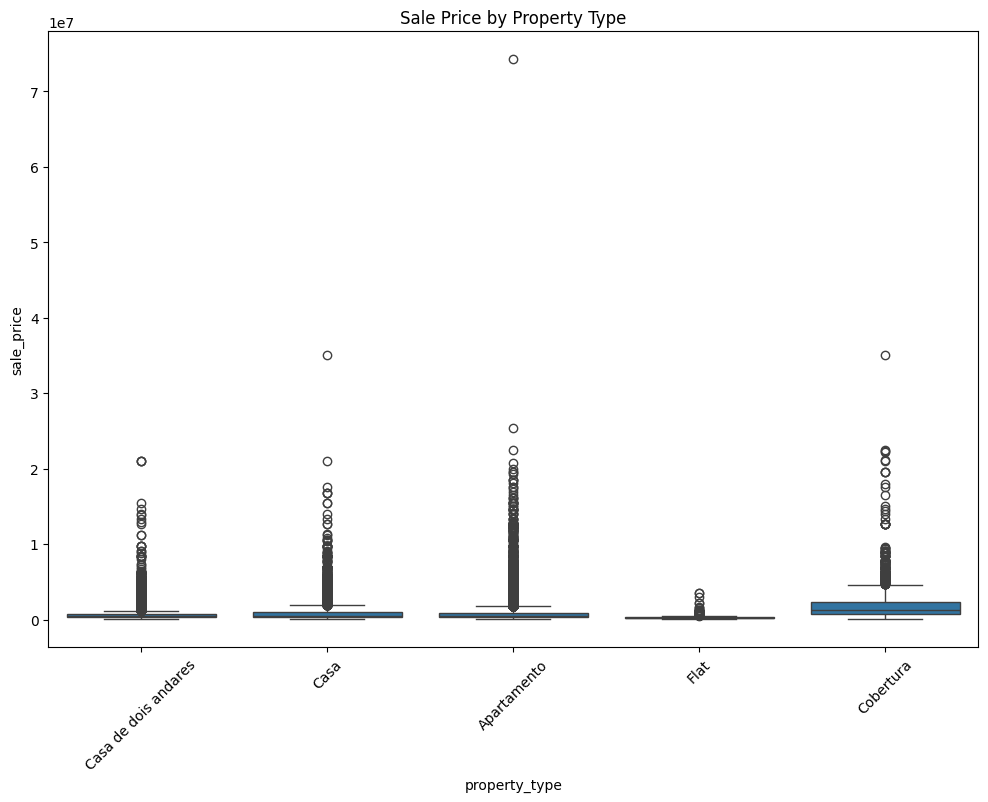

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="property_type", y="sale_price", data=sp_data)
plt.title("Sale Price by Property Type")
plt.xticks(rotation=45)
plt.show()

1. **Cobertura (Penthouse)**
    - Penthouses tend to have the highest sale prices among the property types.
    - The distribution shows a wider range and higher median sale price compared to other property types.
    - There are several outliers with significantly higher prices.

2. **Apartamento (Apartment)**
    - Apartments have a relatively wide range of sale prices.
    - The median sale price is lower than that of penthouses but higher than other property types.
    - There are also many outliers, indicating that some apartments are priced much higher than the typical range.

3. **Casa (House)**
    - Houses have a moderate range of sale prices.
    - The median sale price is similar to that of two-story houses and lower than that of apartments and penthouses.
    - There are several outliers, but not as many as in the case of apartments or penthouses.

4. **Casa the dois andares (Two-story house)**
    - Two-story houses have sale prices similar to single-story houses.
    - The range and median sale price are comparable to those of single-story houses.
    - There are some outliers, but fewer compared to apartments and penthouses.

5. **Flat**
    - Flats have the lowest range and median sale prices among the property types.
    - The distribution is relatively compact, with fewer outliers compared to other property types.

6. **General Observations**
    - Penthouses (Cobertura) and Apartments (Apartamento) exhibit higher variability in sale prices, suggesting a broader market range.
    - Houses and two-story houses have similar pricing distributions, indicating they might be priced based on similar characteristics or market segments.
    - Flats generally have lower sale prices and less variability, possibly indicating a more uniform market segment or standard features.

## Summary of Exploratory Data Analysis (EDA)

### Data Overview
- **Numerical Features:** Usable are, bathrroms, suites, bedrooms, garage spots and sale price
- **Catagorical Features:** property type.
- **Missing Values:** Present in usable area, bathrooms, suites, bedrooms and garage spots.

### Univariates Analysis

#### Numerical variables:
- Usable area, bathrooms, suites, bedrooms, and garage spots have significant outliers.
- Sape price is highly skewed with extreme values.

#### Categorical Variables:
- "Apartamento" is the most common property type.

### Bivariate Analysis

#### Correlation Matrix:
- High positive correlation between suites and bathrooms.
- Moderate positive correlation between suites and bedrooms, suites and sale price, and suites and garage spots.
- Low positive correlation between other pair of variables.

#### Scatter Plots:
- Positive correlation between usable area and sale price, bedrooms and sale price, and bathrooms and sale price.
- Presence of outliers in all relationships.

#### Boxplots:
- Sale price varies significantly across property types.
- Certain property types have higher media sale prices.

# Processing Data

## Handle Missing Values

### Inputation Strategies
1. **Usable Area:** Impute with median (to handle skewness).
2. **Bathrooms:** Impute with the media (very few missing values).
2. **Bedrooms:** Impute with the media (very few missing values).
3. **Suites:** Impute with the mode (common in real state data).
4. **Garage Spots:** Impute with the median (to handle skewness).

In [10]:
def handle_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    df_copy = df.copy()
    df_copy["usable_area"] = df_copy["usable_area"].fillna(
        df_copy["usable_area"].median()
    )
    df_copy["bathrooms"] = df_copy["bathrooms"].fillna(df_copy["bathrooms"].median())
    df_copy["bedrooms"] = df_copy["bedrooms"].fillna(df_copy["bedrooms"].median())
    df_copy["suites"] = df_copy["suites"].fillna(df_copy["suites"].mode()[0])
    df_copy["garage_spots"] = df_copy["garage_spots"].fillna(
        df_copy["garage_spots"].median()
    )
    return df_copy

In [11]:
imputed_sp_data = handle_missing_values(sp_data)
imputed_sp_data.isna().sum().to_frame("Number of missing values")

,Number of missing values
property_type,0
usable_area,0
bathrooms,0
suites,0
bedrooms,0
garage_spots,0
sale_price,0


## Outliers Detection

### Outliers Identification

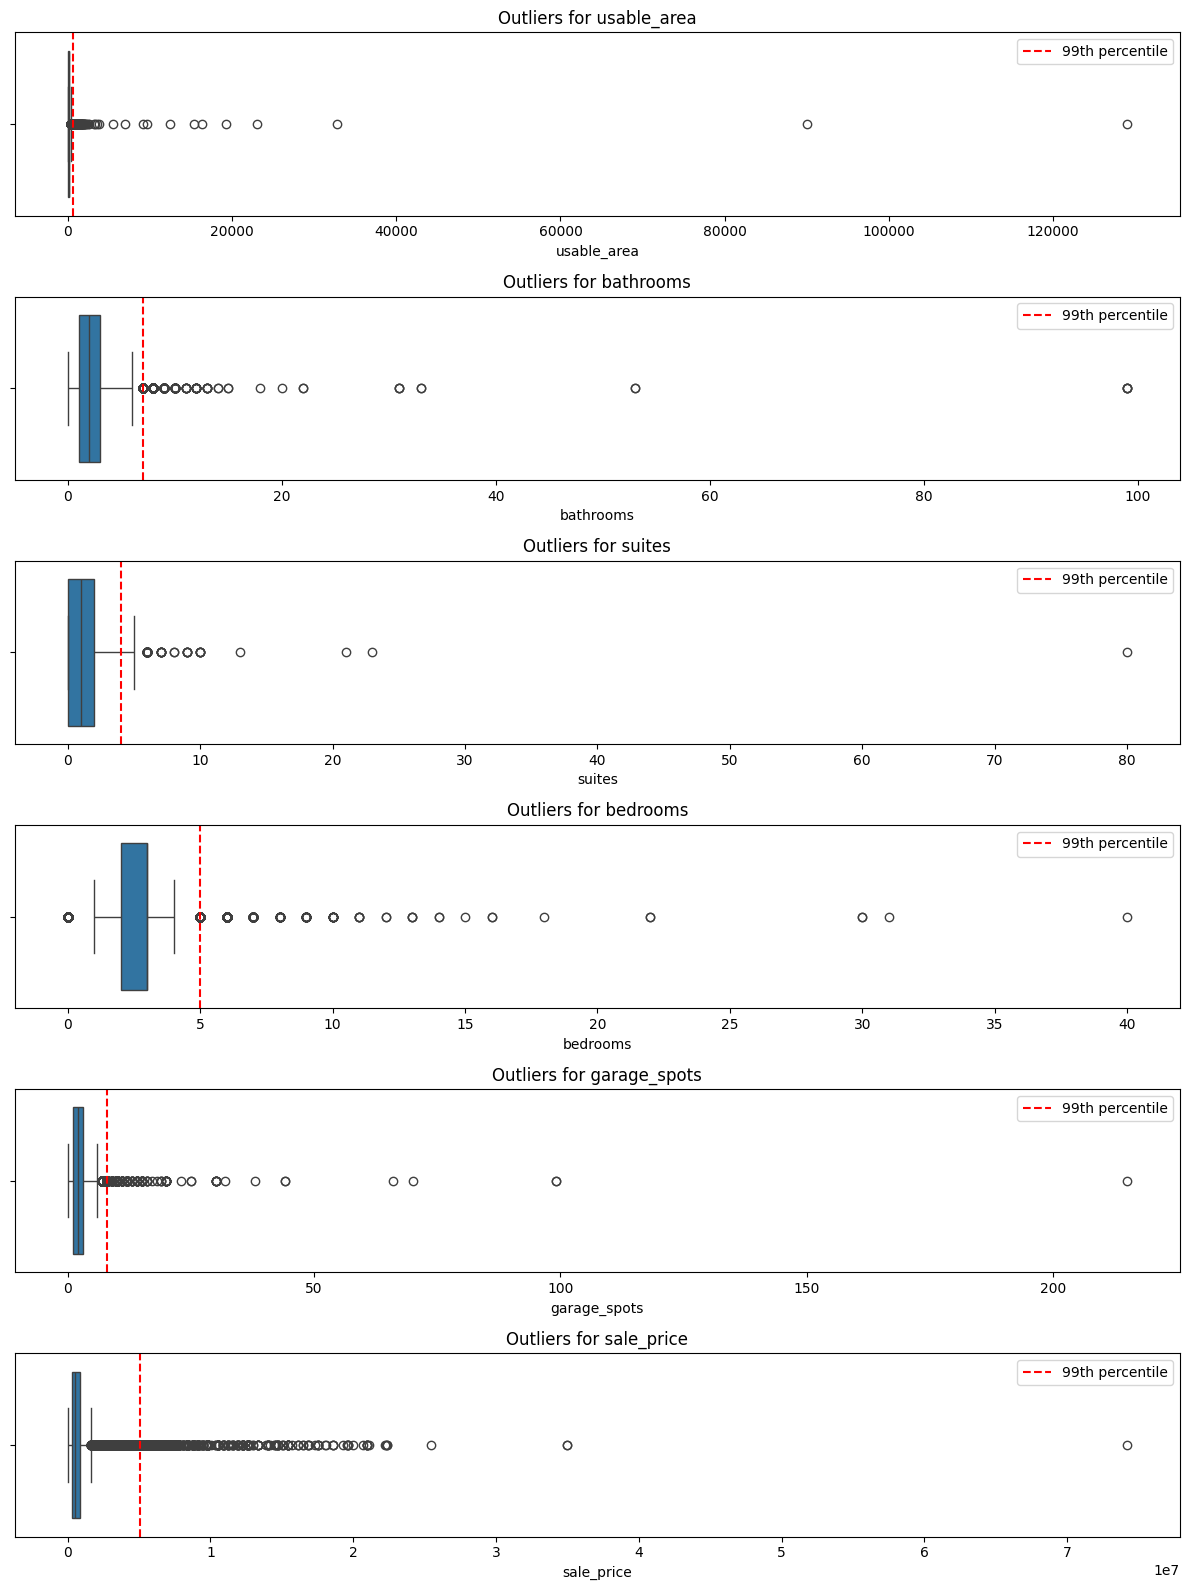

In [12]:
plt.figure(figsize=(12, 16))

for i, col in enumerate(numerical_columns):
    plt.subplot(6, 1, i + 1)
    sns.boxplot(x=imputed_sp_data[col])
    percentile_99 = imputed_sp_data[col].quantile(0.99)
    plt.axvline(x=percentile_99, color="red", linestyle="--", label="99th percentile")
    plt.legend()
    plt.title(f"Outliers for {col}")

plt.tight_layout()
plt.show()

In [13]:
outliers_df = pd.DataFrame()

for col in numerical_columns:
    lower_bound = imputed_sp_data[col].quantile(0.01)
    upper_bound = imputed_sp_data[col].quantile(0.99)
    outliers_df[col] = (imputed_sp_data[col] < lower_bound) | (imputed_sp_data[col] > upper_bound)

outliers_df.sum()

usable_area     1830
bathrooms        393
suites           387
bedrooms         835
garage_spots     546
sale_price      1866
dtype: int64

In [36]:
def handle_outliers(df: pd.DataFrame) -> pd.DataFrame:
    numerical_columns = [
        "usable_area",
        "bathrooms",
        "suites",
        "bedrooms",
        "garage_spots",
        "sale_price",
    ]

    bounds = {}
    outliers_df = pd.DataFrame()

    for col in numerical_columns:
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)

        outliers_df[col] = (df[col] < lower_bound) | (df[col] > upper_bound)
        bounds[col] = lower_bound, upper_bound

    df_filtered = df[~(outliers_df.sum(axis="columns") > 1)].copy()

    for col, (lower_bound, upper_bound) in bounds.items():
        df_filtered[col] = df_filtered[col].clip(lower=lower_bound, upper=upper_bound)

    return df_filtered

In [37]:
cleanded_sp_data = handle_outliers(imputed_sp_data)
cleanded_sp_data

,property_type,usable_area,bathrooms,suites,bedrooms,garage_spots,sale_price
0,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,700000.0
1,Casa,129.0,2.0,1.0,3.0,2.0,336000.0
3,Apartamento,80.0,2.0,1.0,3.0,2.0,739643.0
6,Apartamento,94.0,1.0,0.0,3.0,2.0,630700.0
9,Apartamento,141.0,4.0,3.0,4.0,2.0,1106000.0
...,...,...,...,...,...,...,...
133957,Apartamento,270.0,4.0,3.0,3.0,4.0,2835000.0
133958,Apartamento,60.0,1.0,1.0,1.0,1.0,251999.0
133959,Apartamento,53.0,2.0,1.0,2.0,1.0,249782.0
133961,Apartamento,30.0,3.0,2.0,3.0,2.0,623000.0


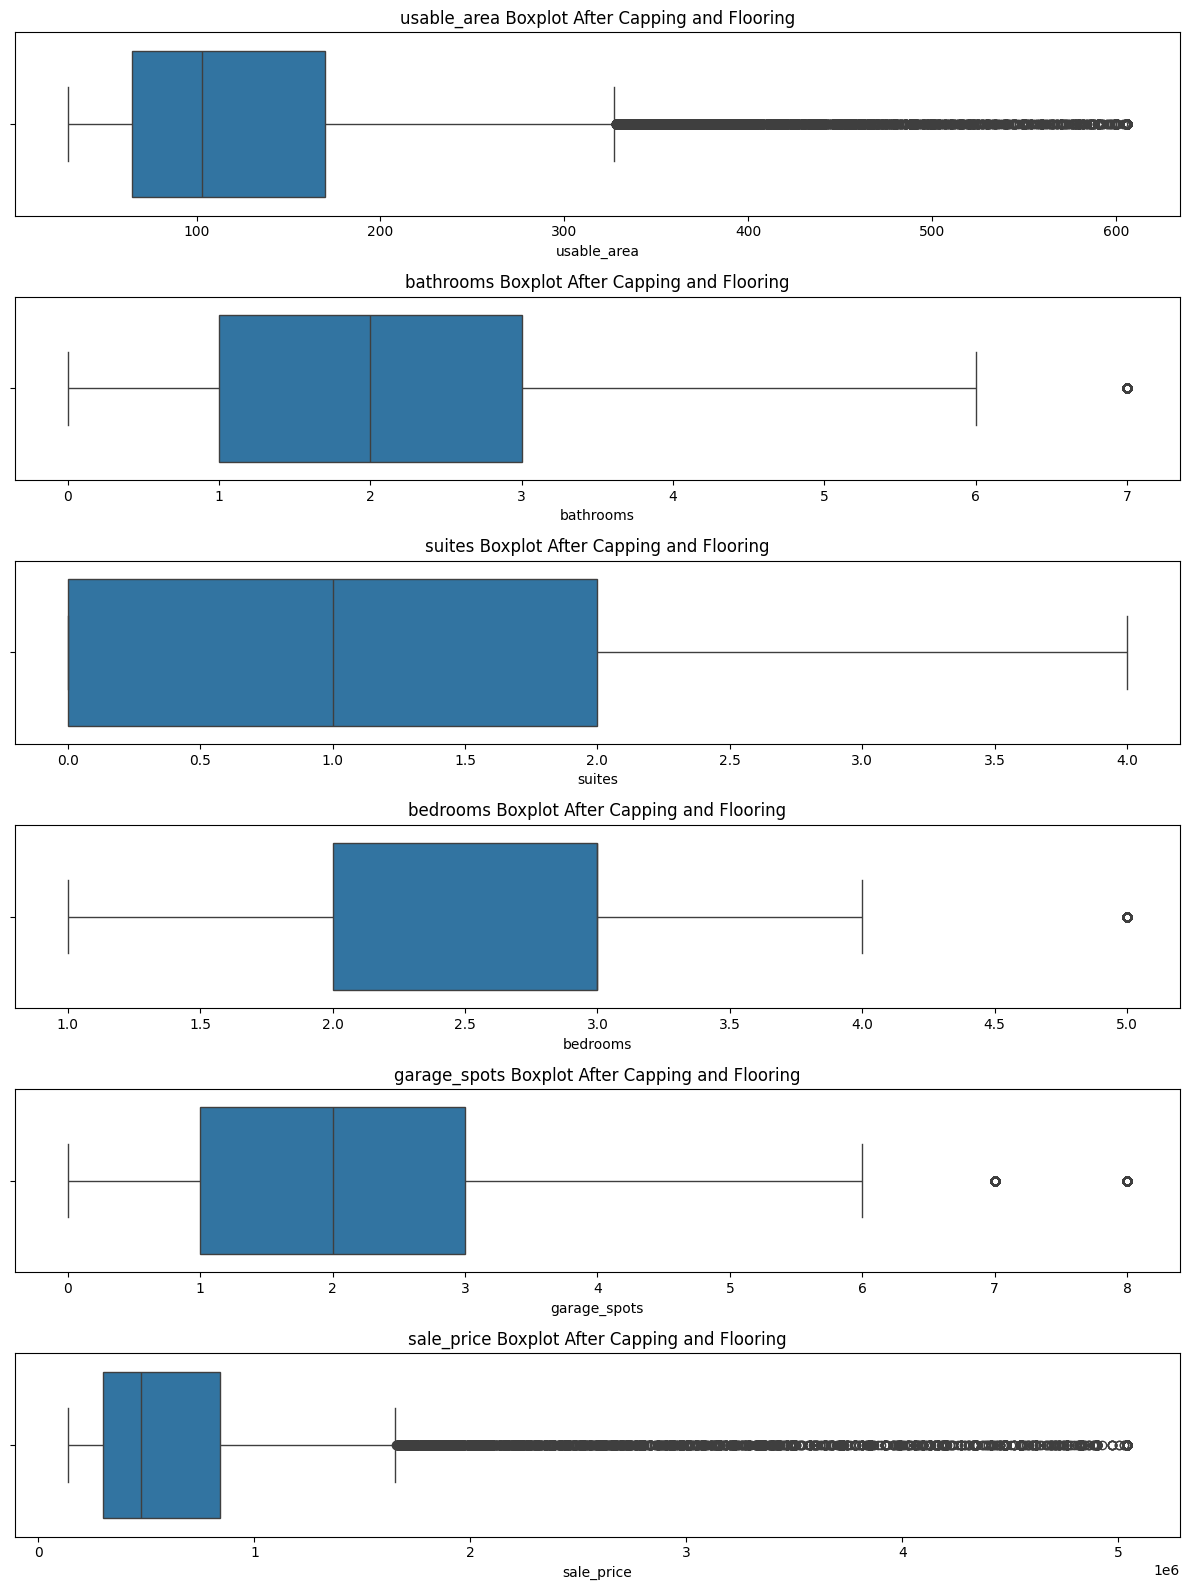

In [38]:
plt.figure(figsize=(12, 16))

for i, col in enumerate(numerical_columns):
    plt.subplot(6, 1, i + 1)
    sns.boxplot(x=cleanded_sp_data[col])
    plt.title(f'{col} Boxplot After Capping and Flooring')

plt.tight_layout()
plt.show()

## Bivariate Analysis Revisited

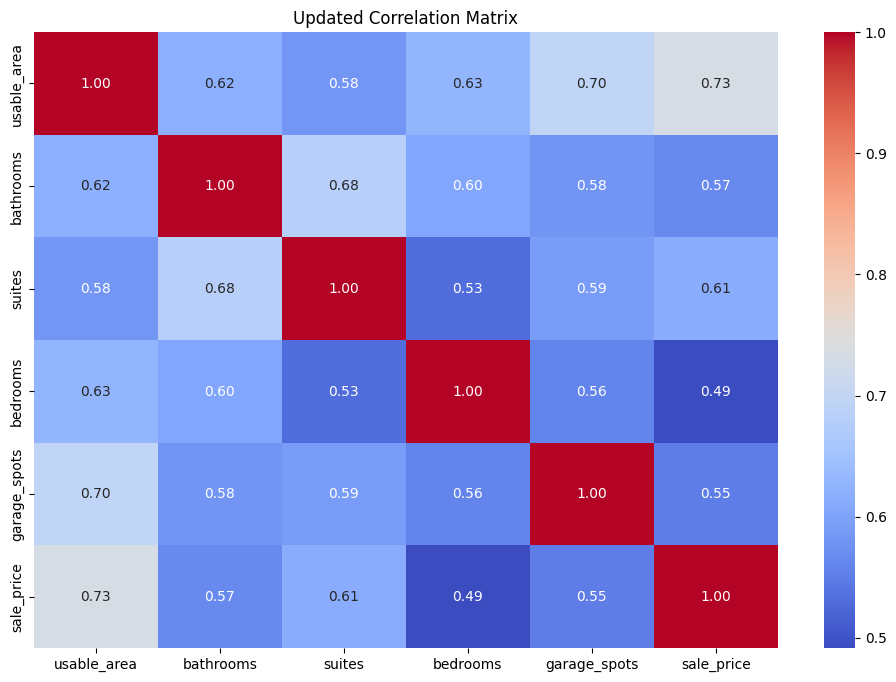

In [39]:
correlation_matrix = cleanded_sp_data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Updated Correlation Matrix")
plt.show()

1. **Sale Price** has a strong positive correlation with **Usable Area** (0.76).
2. **Bedrooms** and **Bathrooms** are positively correlated (0.61).
3. **Usable Area** is positively correlated with **Bedrooms** (0.63), **Bathrooms** (0.63), and **Suites** (0.60).

<Figure size 1600x2500 with 0 Axes>

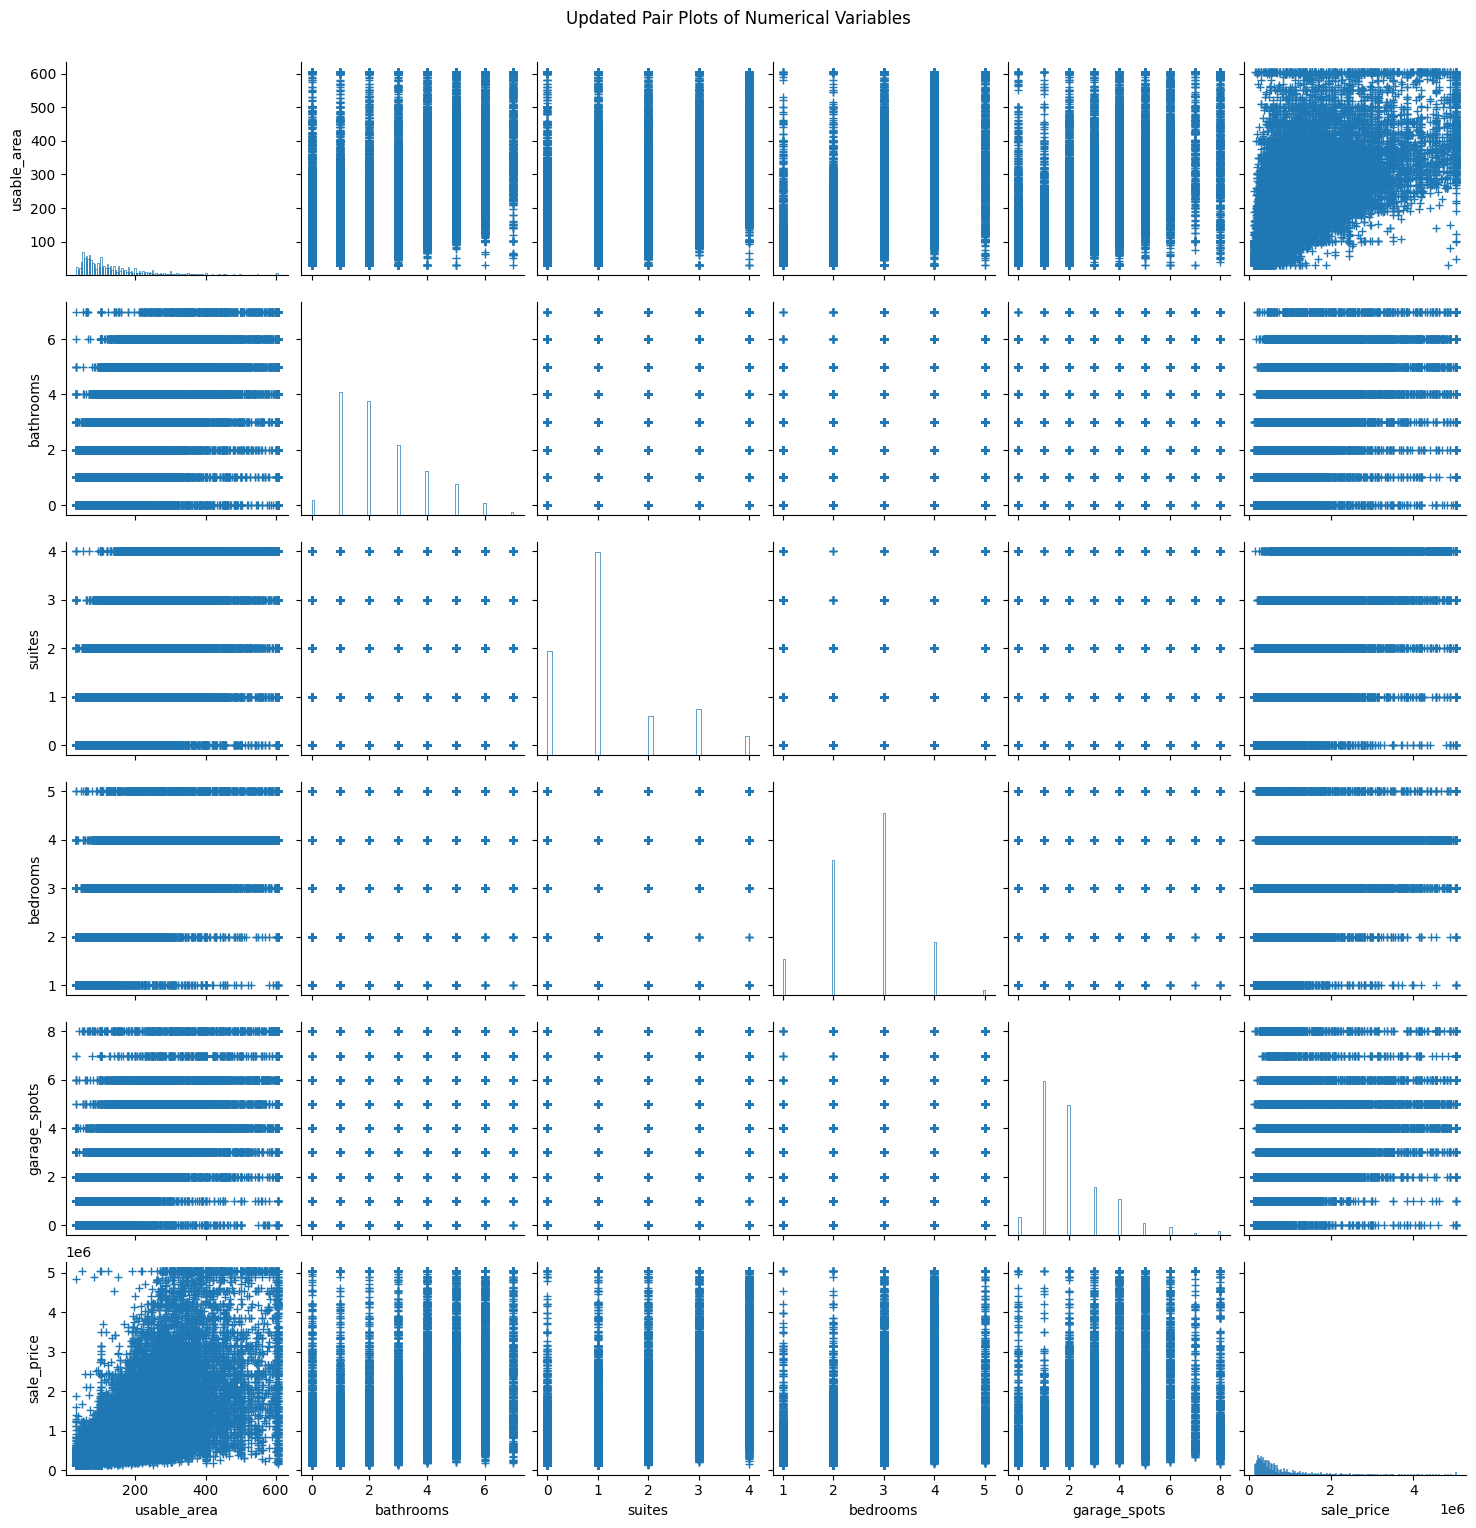

In [40]:
plt.figure(figsize=(16, 25))
sns.pairplot(
    cleanded_sp_data[numerical_columns].dropna(),
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)
plt.suptitle("Updated Pair Plots of Numerical Variables", y=1.02)
plt.show()

1. **Usable Area and Sale Price:**
    - Strong positive relationship, confirming the correlation seen in the heatmap.

2. **Bedrooms and Sale Price:**
    - Positive relationship, with sale price generally increasing with the number of bedrooms.

3. **Bathrooms and Sale Price:**
    - Similar positive relationship with bedrooms, indicating higher sale prices with more bathrooms.

4. **Suites and Sale Price:**
    - Positive relationship, with higher sale prices observed for properties with more suites.

5. **Garage Spots and Sale Price:**
    - Positive correlation, though less pronounced compared to usable area and sale price.

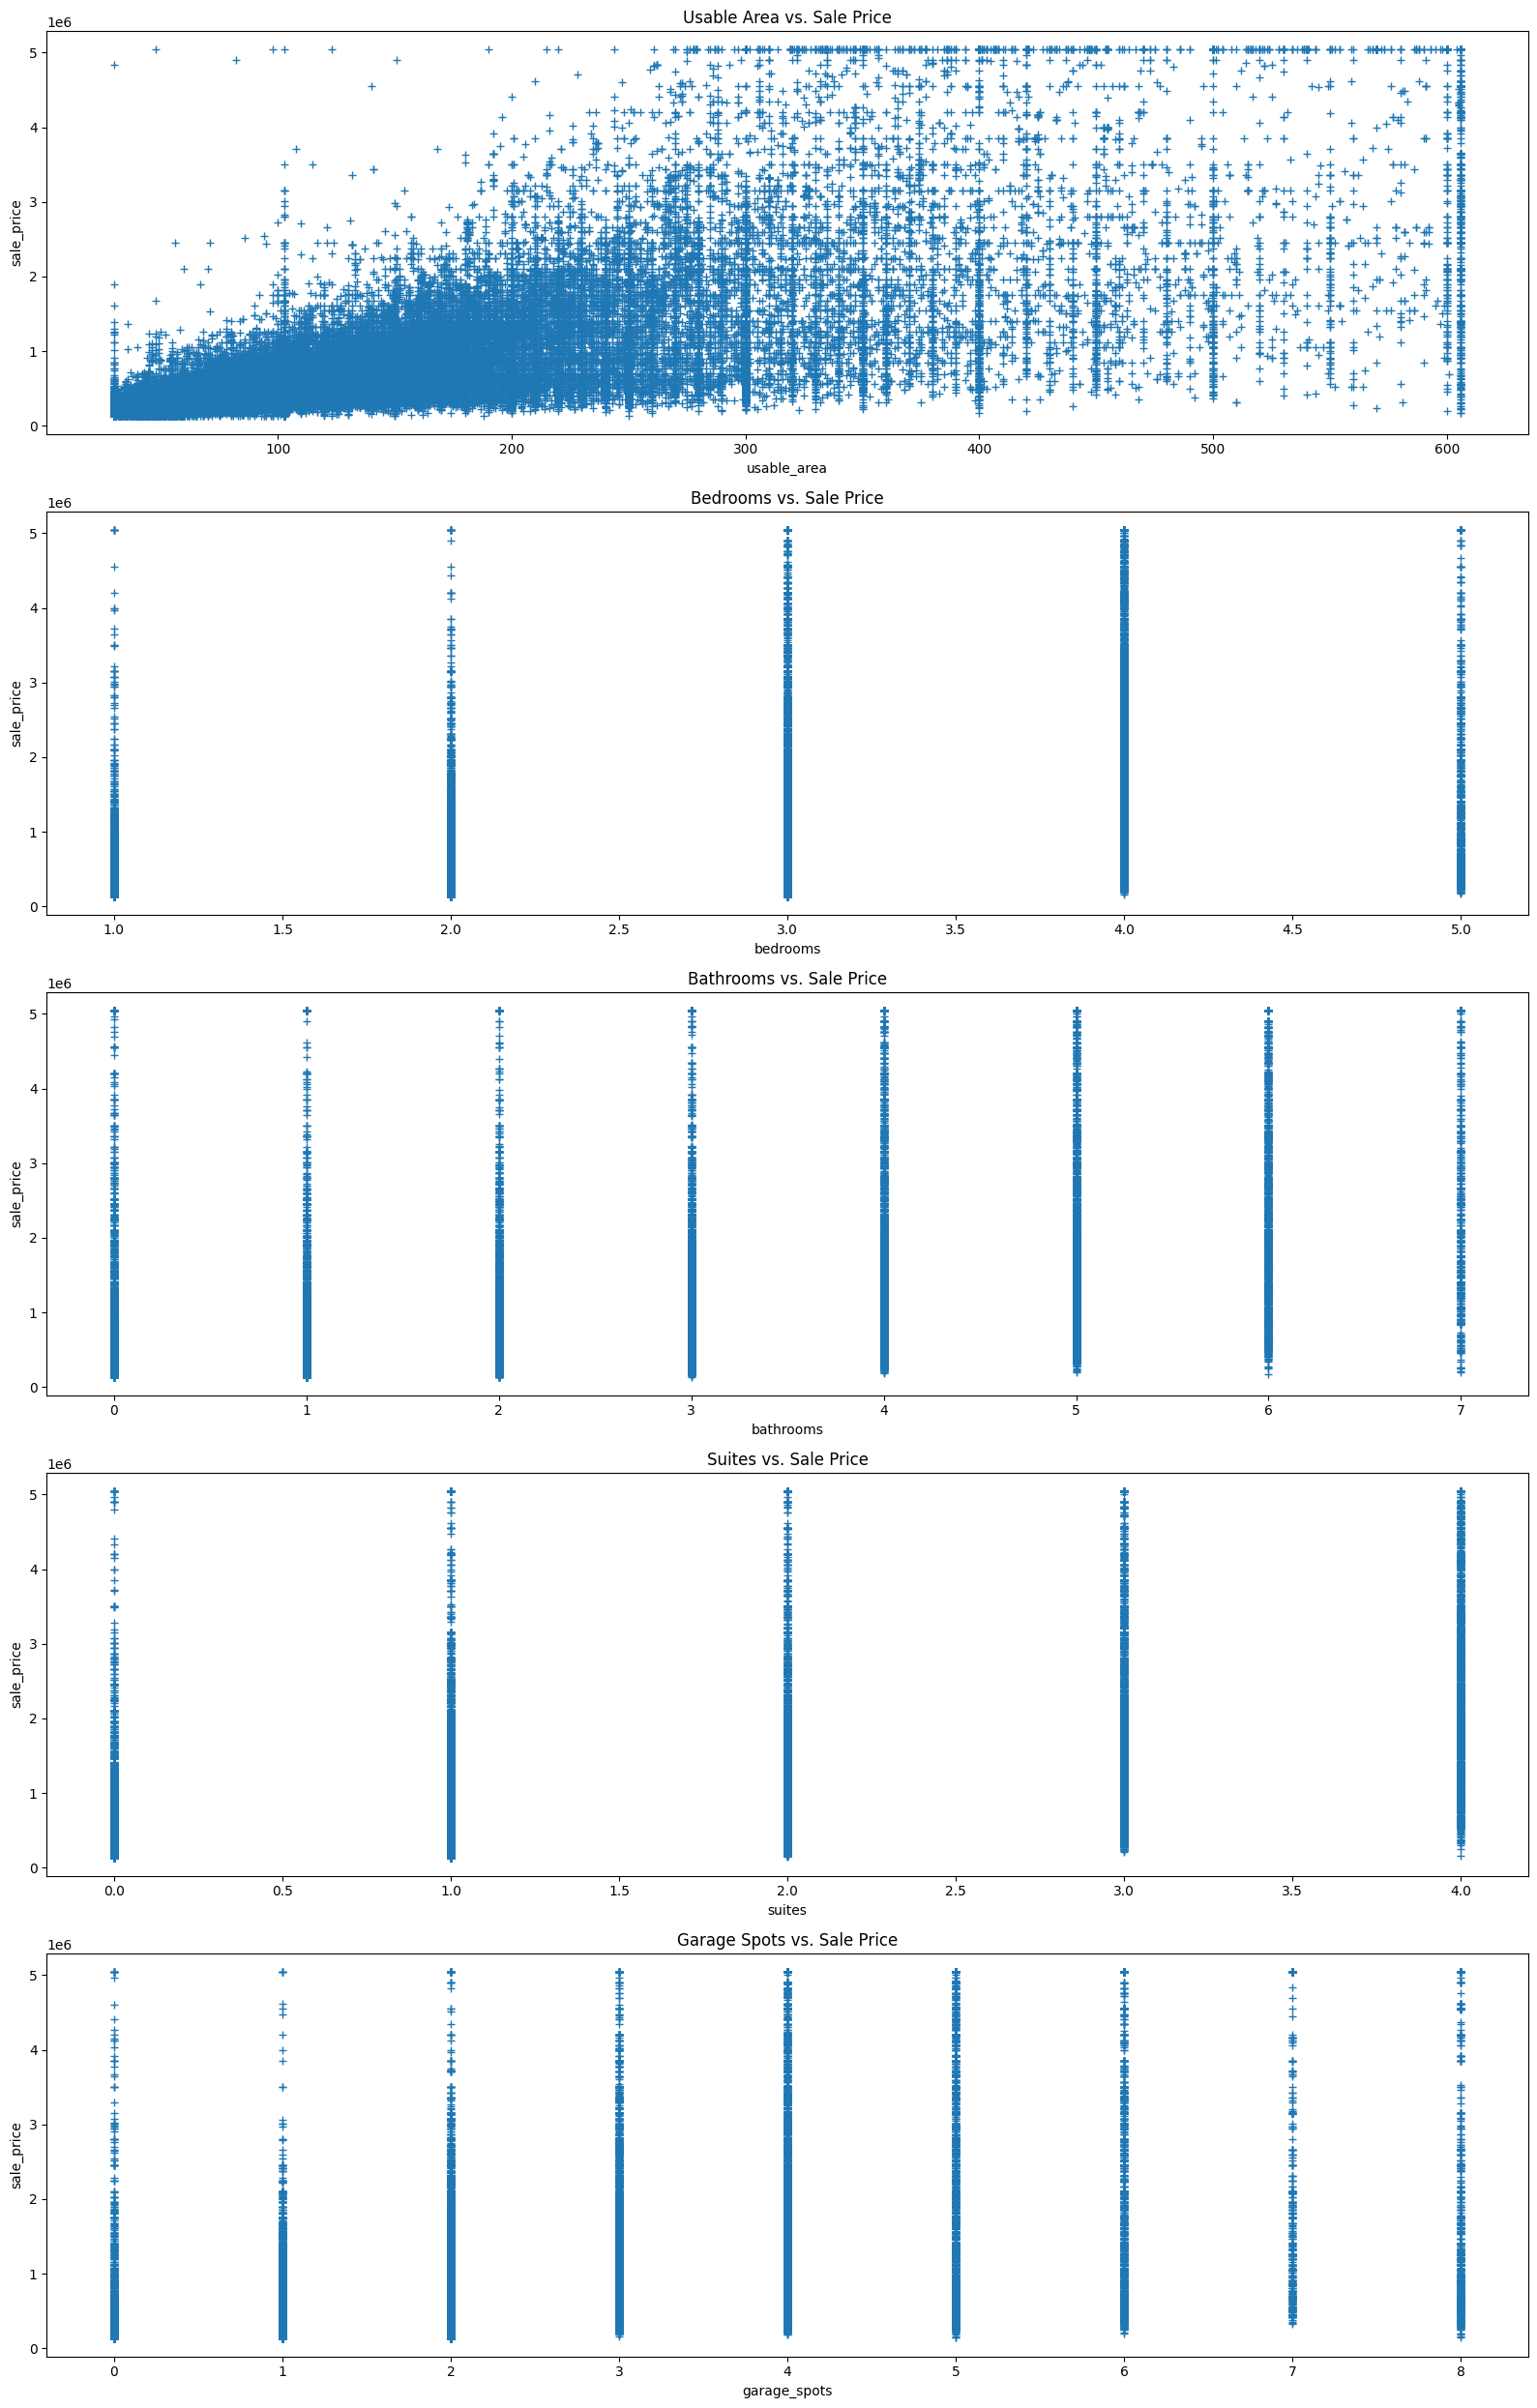

In [41]:
plt.figure(figsize=(16, 25))

plt.subplot(5, 1, 1)
sns.scatterplot(
    x="usable_area", y="sale_price", data=cleanded_sp_data, marker="+", linewidth=1
)
plt.title("Usable Area vs. Sale Price")

plt.subplot(5, 1, 2)
sns.scatterplot(
    x="bedrooms", y="sale_price", data=cleanded_sp_data, marker="+", linewidth=1
)
plt.title("Bedrooms vs. Sale Price")

plt.subplot(5, 1, 3)
sns.scatterplot(
    x="bathrooms", y="sale_price", data=cleanded_sp_data, marker="+", linewidth=1
)
plt.title("Bathrooms vs. Sale Price")

plt.subplot(5, 1, 4)
sns.scatterplot(
    x="suites", y="sale_price", data=cleanded_sp_data, marker="+", linewidth=1
)
plt.title("Suites vs. Sale Price")

plt.subplot(5, 1, 5)
sns.scatterplot(
    x="garage_spots", y="sale_price", data=cleanded_sp_data, marker="+", linewidth=1
)
plt.title("Garage Spots vs. Sale Price")

plt.tight_layout()
plt.show()

1. **Usable Area vs. Sale Price:**
    - Clear positive relationship, with higher usable areas corresponding to higher sale prices.
    - Some dispersion at higher usable areas, indicating variability in high value properties.

2. **Bedrooms vs. Sale Price:**
    - Positive correlation, though with some variability in sale prices for properties with the same number of bedrooms.
    - Higher bedroom counts generally correspond to higher sale prices.

3. **Bathrooms vs. Sale Prices:**
    - Similar positive relationship to bedrooms, with more bathrooms typically leading to higher sale prices.
    - Some outliers with a high number of bathrooms.

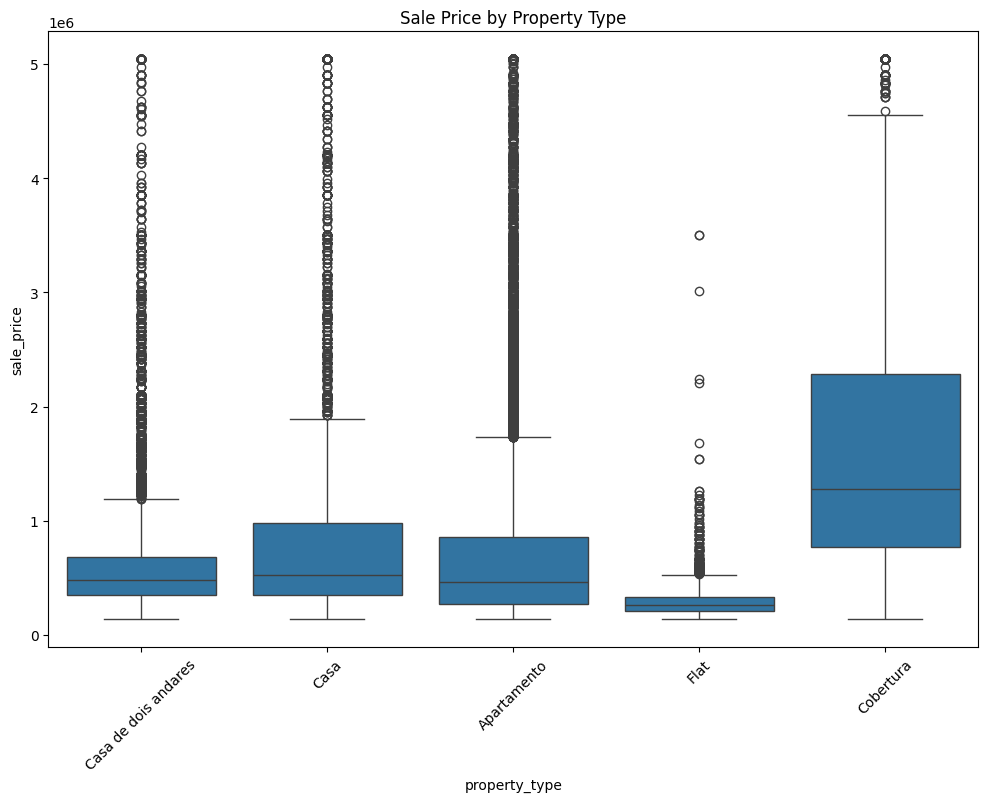

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="property_type", y="sale_price", data=cleanded_sp_data)
plt.title("Sale Price by Property Type")
plt.xticks(rotation=45)
plt.show()

### Summary of Variable Relationships
- **Sale Price** is positively correlated with **Usable Area**, **Bedrooms**, **Bathrooms**, **Suites**, and **Garage Spots**.
- Visualizations confirm these relation ships, with some variability and outliers in higher ranges.